In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Project-cap2'

In [2]:
os.chdir('C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Project-cap2\\data')
os.getcwd()

'C:\\Users\\Amit\\Desktop\\SPRINGBOARD PROJECTS\\Project-cap2\\data'

In [3]:
os.listdir()

['Moving_Average_Data.csv', 'Original_dataframe.csv']

In [4]:
MAD = pd.read_csv('Moving_Average_Data.csv')
ODF = pd.read_csv('Original_dataframe.csv')

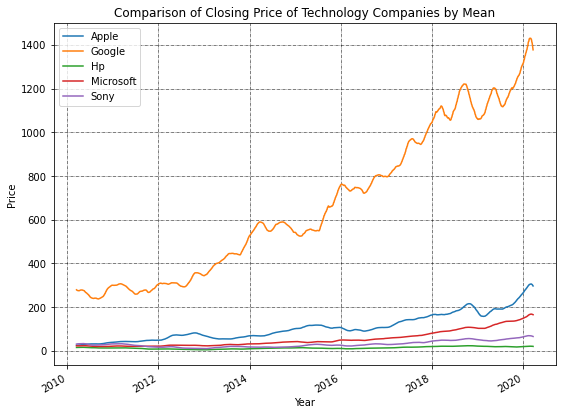

In [10]:
# Rolling mean of all companies with a window of 50 days. 
%matplotlib inline
MAD.plot(x='Date',figsize=(9,7))
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Comparison of Closing Price of Technology Companies by Mean')
plt.show()


In [11]:
# convert Date into a datetime object for both df
ODF['Date'] = pd.to_datetime(ODF['Date'])
MAD['Date'] = pd.to_datetime(MAD['Date'])
ODF.info()
MAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12860 entries, 0 to 12859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12860 non-null  datetime64[ns]
 1   High          12860 non-null  float64       
 2   Low           12860 non-null  float64       
 3   Open          12860 non-null  float64       
 4   Close         12860 non-null  float64       
 5   Volume        12860 non-null  float64       
 6   Adj Close     12860 non-null  float64       
 7   company_name  12860 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 753.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2572 non-null   datetime64[ns]
 1   Apple      2523 non-null   float64       
 2   Google     2523 non-

In [7]:
ODF.head()

,Date,High,Low,Open,Close,Volume,Adj Close,company_name
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.419203,AAPL
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.464878,AAPL
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.043921,AAPL
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,25.995777,AAPL
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.168606,AAPL


In [53]:
# the daily returns on closing price for each company 

close = pd.pivot_table(ODF,index='Date',values='Close',columns='company_name')
returns = close.pct_change()
returns = returns.drop(pd.Timestamp('2010-01-04'),axis=0) # drop NaN values from df
returns.head()

company_name,AAPL,GOOGL,HPQ,MSFT,SNE
Date,,,,,
2010-01-05,0.001729,-0.004404,0.004194,0.000323,-0.004664
2010-01-06,-0.015906,-0.025209,-0.009303,-0.006137,-0.001004
2010-01-07,-0.001849,-0.023280,0.000383,-0.010400,-0.001675
2010-01-08,0.006648,0.013331,0.007471,0.006897,0.020470
2010-01-11,-0.008822,-0.001512,-0.003042,-0.012720,0.006248


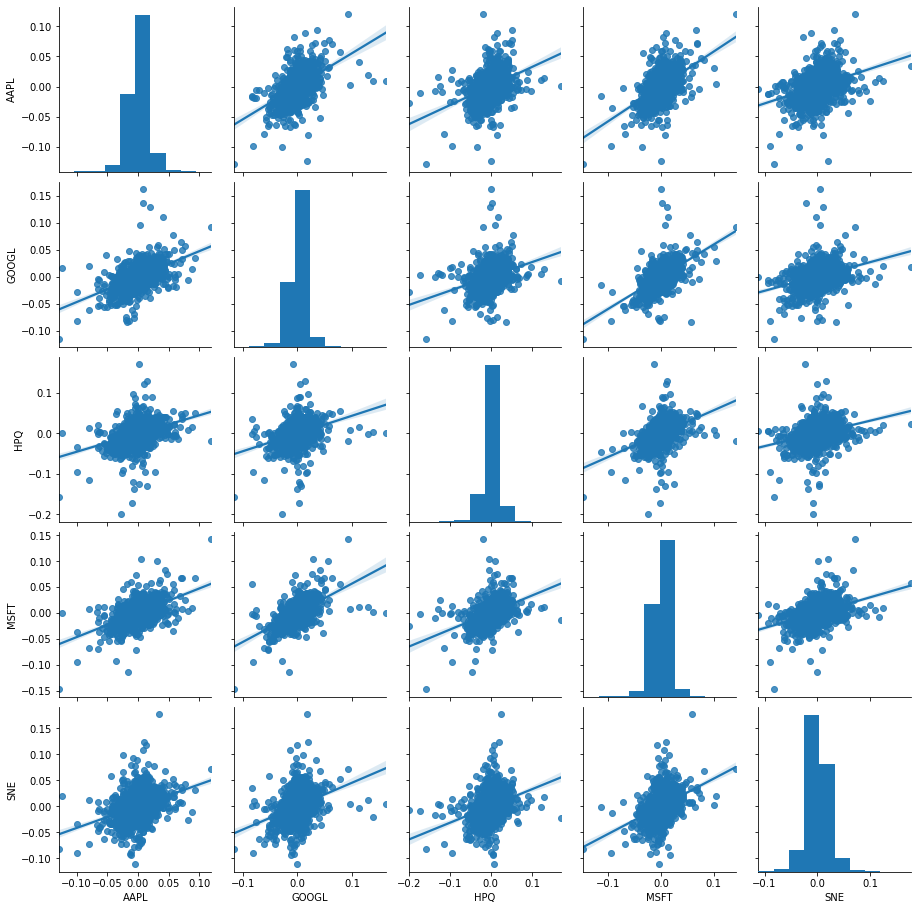

In [69]:
#Pairplot of all companies

import seaborn as sns
_ = sns.pairplot(returns,kind='reg')


In [66]:
# table showing the dates of maximum and minimum closing price by their date

max_min = dict()
close.head()

for com in close.columns:
    max_min[com] = [close[com].idxmin(),close[com].idxmax()]

df_max_min = pd.DataFrame(data=max_min,index=['min','max'])
df_max_min.head()

,AAPL,GOOGL,HPQ,MSFT,SNE
min,2010-02-04,2010-07-06,2012-11-20,2010-06-30,2012-12-04
max,2020-02-12,2020-02-19,2018-10-04,2020-02-10,2020-02-04


In [54]:
# table showing the mean and standard deviation of each company based on their daily returns 
mean_std = dict()

for com in returns.columns:
    mean_std[com] = [np.mean(returns[com]),np.std(returns[com])]

df_mean_std = pd.DataFrame(data=mean_std,index=['mean','std'])
df_mean_std.head()

,AAPL,GOOGL,HPQ,MSFT,SNE
mean,0.000923,0.000598,-0.000002,0.000696,0.000434
std,0.017128,0.015920,0.020472,0.015468,0.020714


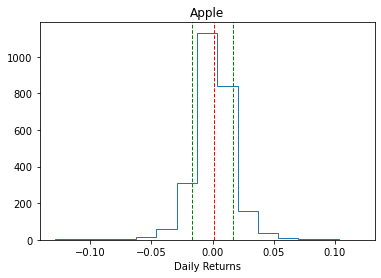

In [55]:
#plot of histogram for each company with the mean and std.
%matplotlib inline 
_ = plt.hist(returns['AAPL'],bins=15,histtype='step')
_ = plt.axvline(df_mean_std.loc['mean','AAPL'],color='red',linestyle='dashed',linewidth=1)
_ = plt.axvline(df_mean_std.loc['std','AAPL'],color='g',linestyle='dashed',linewidth=1)
_ = plt.axvline(-df_mean_std.loc['std','AAPL'],color='g',linestyle='dashed',linewidth=1)
_ = plt.xlabel('Daily Returns')
_ = plt.title('Apple')
plt.show()

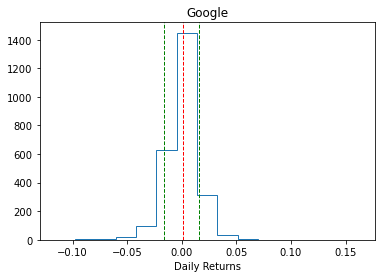

In [56]:
%matplotlib inline 
_ = plt.hist(returns['GOOGL'],bins=15,histtype='step')
_ = plt.axvline(df_mean_std.loc['mean','GOOGL'],color='red',linestyle='dashed',linewidth=1)
_ = plt.axvline(df_mean_std.loc['std','GOOGL'],color='g',linestyle='dashed',linewidth=1)
_ = plt.axvline(-df_mean_std.loc['std','GOOGL'],color='g',linestyle='dashed',linewidth=1)
_ = plt.xlabel('Daily Returns')
_ = plt.title('Google')
plt.show()

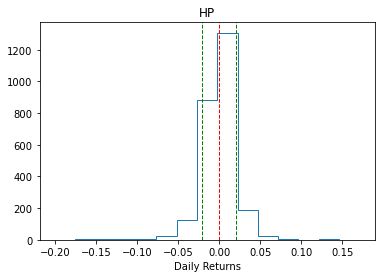

In [57]:
%matplotlib inline 
_ = plt.hist(returns['HPQ'],bins=15,histtype='step')
_ = plt.axvline(df_mean_std.loc['mean','HPQ'],color='red',linestyle='dashed',linewidth=1)
_ = plt.axvline(df_mean_std.loc['std','HPQ'],color='g',linestyle='dashed',linewidth=1)
_ = plt.axvline(-df_mean_std.loc['std','HPQ'],color='g',linestyle='dashed',linewidth=1)
_ = plt.xlabel('Daily Returns')
_ = plt.title('HP')
plt.show()

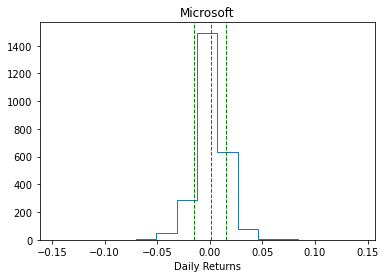

In [58]:
%matplotlib inline 
_ = plt.hist(returns['MSFT'],bins=15,histtype='step')
_ = plt.axvline(df_mean_std.loc['mean','MSFT'],color='red',linestyle='dashed',linewidth=1)
_ = plt.axvline(df_mean_std.loc['std','MSFT'],color='g',linestyle='dashed',linewidth=1)
_ = plt.axvline(-df_mean_std.loc['std','MSFT'],color='g',linestyle='dashed',linewidth=1)
_ = plt.xlabel('Daily Returns')
_ = plt.title('Microsoft')
plt.show()

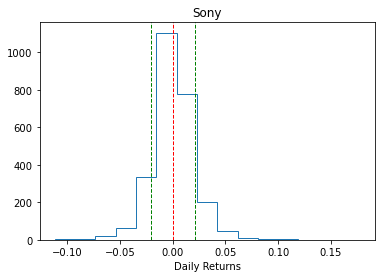

In [59]:
%matplotlib inline 
_ = plt.hist(returns['SNE'],bins=15,histtype='step')
_ = plt.axvline(df_mean_std.loc['mean','SNE'],color='red',linestyle='dashed',linewidth=1)
_ = plt.axvline(df_mean_std.loc['std','SNE'],color='g',linestyle='dashed',linewidth=1)
_ = plt.axvline(-df_mean_std.loc['std','SNE'],color='g',linestyle='dashed',linewidth=1)
_ = plt.xlabel('Daily Returns')
_ = plt.title('Sony')
plt.show()

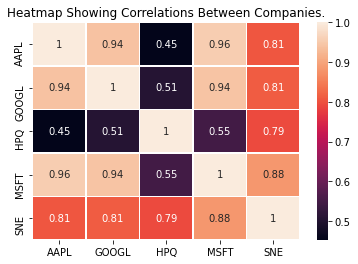

In [82]:
#Heatmap showing correlation coeffcients 
fig, ax = plt.subplots(1, 1)
_ = sns.heatmap(close.corr(),annot=True,linewidth=0.5)
_ = plt.title('Heatmap Showing Correlations Between Companies.')
_ = ax.set_ylabel('')
_ = ax.set_xlabel('')